# LABORATORIO 3

## Integrantes

### INTEGRANTES DEL EQUIPO
* MARIA PAULA MOGOLLON
* SERGIO NICOLAS QUINTERO
* LIDA VIVIANA PINEDA
* CRISTIAN CAMILO CARDENAS RODRIGUEZ

#### OBJETIVOS QUE ESPERAMOS ALCANZAR EN ESTE ANALISIS

* Tasa de Registro por Género: Porcentaje de registros por género. ok
Fórmula: (Número de registros de un género específico / Total de registros) * 100  
    * Diagrama de pastel

* Distribución demográfica por género: Porcentaje de individuos identificados como masculinos, femeninos u otros. - Lida 
    * Mapa de violin
  
* Tasa de registro por nivel educativo: Porcentaje de registros agrupados por nivel educativo. ok
    * Diagrama de pastel
  
* Kpi relacionando nivel educativo y genero ok
    * Diagrama de barras
  
* Kpi relacionar, violencia con Lgbti - OK
    * Diagrama de dispersion - pastel
  
* Kpi Servidores publicos que tomaron el curso - OK
    * Diagrama de pastel
  
* Kpi nivel educativo, la columna tipo y grupo étnico - ok
    * Diagrama de barras - columnas apiladas - correlación

* Kpi personas con discapacidad visual y su ocupación - ok
    * Torta - Barras apiladas - "Tabla"

* Kpi Discapacidad por genero -- revisar sino cambiar gráfico - por genero y discapacidad - ok
    * Matriz de correlacion

* Kpi Nivel educativo vs año de fecha de corte - Sergio - Revisar
    * Graficas de linea relacionando el tiempo de fecha corte o cantidad registro o vigencia (punto,ejes)


In [1]:
#Importacion de librerias 
import sys
sys.path.append("C:\\Users\\cc_ca\\OneDrive\\Escritorio\\Desarrollo web\\Analisis de Datos\\Python\\Scripts\\TalentoTech\\Dev\\env\\Lib\\site-packages")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\cc_ca\AppData\Local\Temp\ipykernel_23404\4243686491.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
try:
    # Leer el archivo CSV ubicado en la ruta especificada y asigna los datos a la variable df_resultados
    df_Ciudadania_digital = pd.read_csv('..\\Data\\Ciudadano_Digital.csv')

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print("El dataset se cargó exitosamente.")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileNotFoundError as e:
    
    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"Error: El archivo no se pudo encontrar. Detalles: {e}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except Exception as e:
    
    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f"Error inesperado: {e}")

El dataset se cargó exitosamente.


In [3]:
df_Ciudadania_digital.columns

Index(['TIPO DE DOCUMENTO', 'DOCUMENTO', 'EMAIL', 'CELULAR', 'TELEFONO',
       'DEPARTAMENTO NACIMIENTO', 'CIUDAD DE NACIMIENTO', 'DEPARTAME_NOMBRE',
       'MUNICIPIO_NOMBRE', 'DIRECCION', 'NIVEL EDUCATIVO', 'SECTOR', 'ESTRATO',
       'FECHA DE NACIMIENTO', 'EDAD', 'GENERO', 'DISCAPACIDAD', 'ALIADO',
       'SECTOR ECONOMICO', 'OCUPACION', 'FECHA DE REGISTRO',
       'COMUNIDAD ETNICA', 'DINAMIZADOR', 'POBREZA', 'CABEZA DE HOGAR',
       'VICTIMA DE VIOLENCIA', 'VICTIMA INVIERNO', 'LGBTI',
       'VIVIENDA FRONTERIZA', 'SITUACION DE CALLE', 'DESPLAZADO',
       'DESMOVILIZADO REINSERTADO', 'TIPO', 'PRESENCIAL', 'VIRTUAL',
       'ID INDICADOR', 'META', 'INVERSION', 'MUNICIPIO_COD', 'ANIO_VIGENCIA'],
      dtype='object')

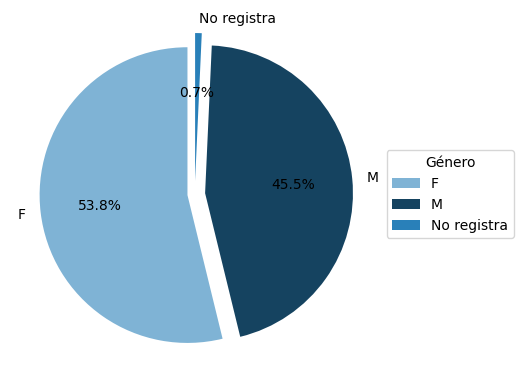

In [4]:
# generar conteo de registros por valor único en la columna GENERO
df_genero = df_Ciudadania_digital['GENERO'].value_counts()

# establecer etiquetas y colores
etiquetas = df_genero.index
colores = ['#7FB3D5','#154360','#2980B9']
explode = [0.05,0.07,0.09]
# crear gráfico de torta
plt.pie(df_genero, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90, explode=explode)

# agregar leyenda
plt.legend(title='Género', loc='center left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show()

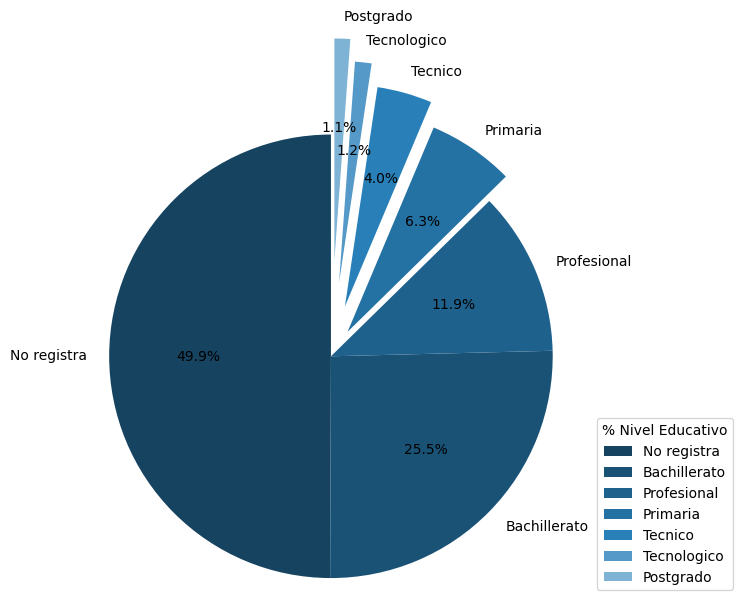

In [5]:
# Combinar las categorías "Especialización", "Maestría" y "Doctorado"
df_Ciudadania_digital['NIVEL EDUCATIVO'] = df_Ciudadania_digital['NIVEL EDUCATIVO'].replace(['Especializacion', 'Maestria', 'Doctorado'], 'Postgrado')

# Generar el conteo de registros por valor único en la columna ESTU_GENERO
df_nivel_educativo = df_Ciudadania_digital['NIVEL EDUCATIVO'].value_counts()

# Establecer etiquetas y colores
etiquetas = ['No registra','Bachillerato','Profesional','Primaria', 'Tecnico', 'Tecnologico', 'Postgrado']
colores = ['#154360','#1A5276','#1F618D','#2471A3','#2980B9','#5499C7','#7FB3D5']
explode = [0,0,0,0.2,0.35,0.5,0.65]

# Crear gráfico de torta
plt.pie(df_nivel_educativo, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90, radius=1.5, explode=explode)

# Agregar leyenda
plt.legend(title='% Nivel Educativo', loc='center left', bbox_to_anchor=(1.2, 0.1))

# Mostrar gráfico
plt.show()

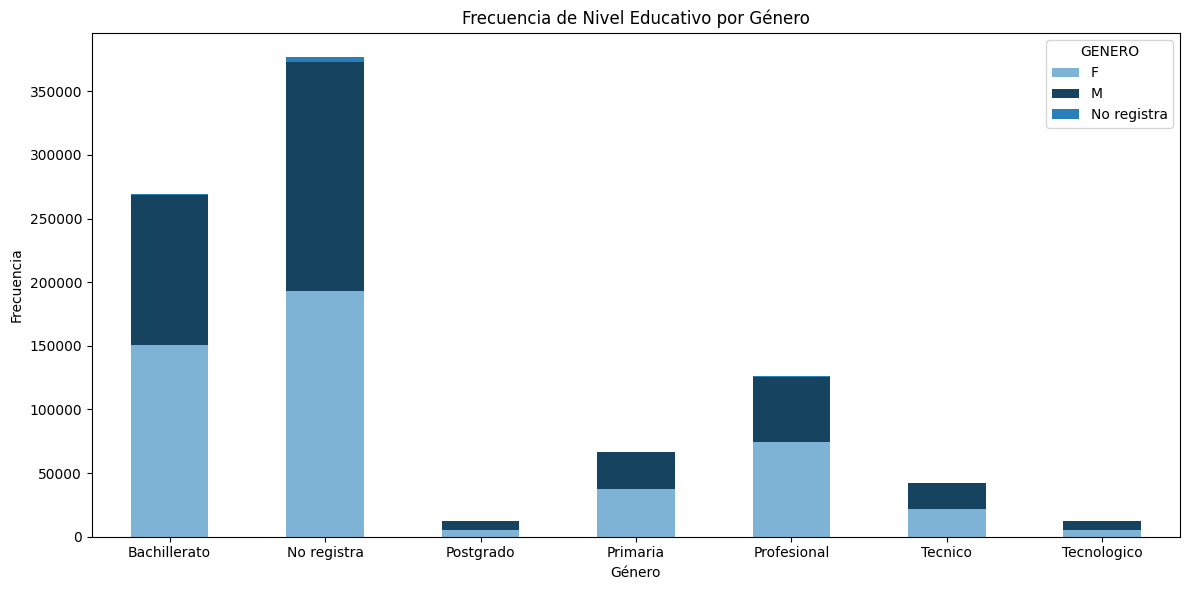

In [41]:
# Obtener valores únicos y frecuencia 
nivel_educativo_counts = df_Ciudadania_digital.groupby('NIVEL EDUCATIVO')['GENERO'].value_counts().unstack()
colors = {'F': '#7FB3D5', 'M': '#154360', 'No registra': '#2980B9'}

# Crear la gráfica de barras apiladas con colores personalizados
nivel_educativo_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[column] for column in nivel_educativo_counts.columns if column in colors])

# Títulos y etiquetas
plt.title('Frecuencia de Nivel Educativo por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para que sean legibles

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [7]:
df_Ciudadania_digital['COMUNIDAD ETNICA'].value_counts()

COMUNIDAD ETNICA
NINGUNO              500829
INDIGENAS             24791
AFRODESCENDIENTES     19154
PALENQUEROS             461
ROM                     434
RAIZAL                  373
Name: count, dtype: int64

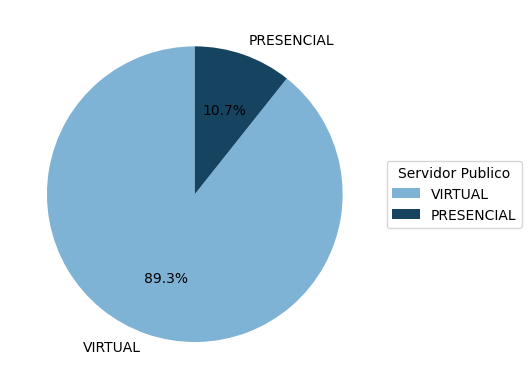

In [8]:
#Kpi Servidores publicos vs la forma en que tomaron el curso.
# generar conteo de registros por valor único en la columna GENERO
df_servidor_publico = df_Ciudadania_digital[df_Ciudadania_digital['OCUPACION'] == 'Servidor Publico']	
# Contar la cantidad de registros por valor único en la columna OCUPACION
ocupacion_counts = df_servidor_publico['TIPO'].value_counts()
# Establecer etiquetas y colores
etiquetas = ocupacion_counts.index
colores = ['#7FB3D5', '#154360']
# Crear gráfico de torta
plt.pie(ocupacion_counts, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)
# Agregar leyenda
plt.legend(title='Servidor Publico', loc='center left', bbox_to_anchor=(1.0, 0.5))
# Mostrar gráfico
plt.show()

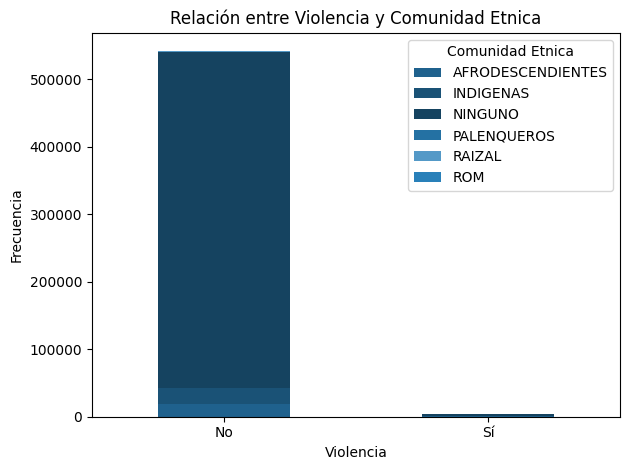

In [40]:
# Conteo de las combinaciones de respuestas
combinaciones = df_Ciudadania_digital.groupby(['VICTIMA DE VIOLENCIA', 'COMUNIDAD ETNICA']).size().unstack()
# Crear el gráfico de barras apiladas
combinaciones.plot(kind='bar', stacked=True, color=['#1F618D', '#1A5276',  '#154360', '#2471A3',  '#5499C7','#2980B9'])
# Títulos y etiquetas
plt.title('Relación entre Violencia y Comunidad Etnica')
plt.xlabel('Violencia')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
# Mostrar la gráfica
plt.legend(title='Comunidad Etnica')
plt.tight_layout()
plt.show()

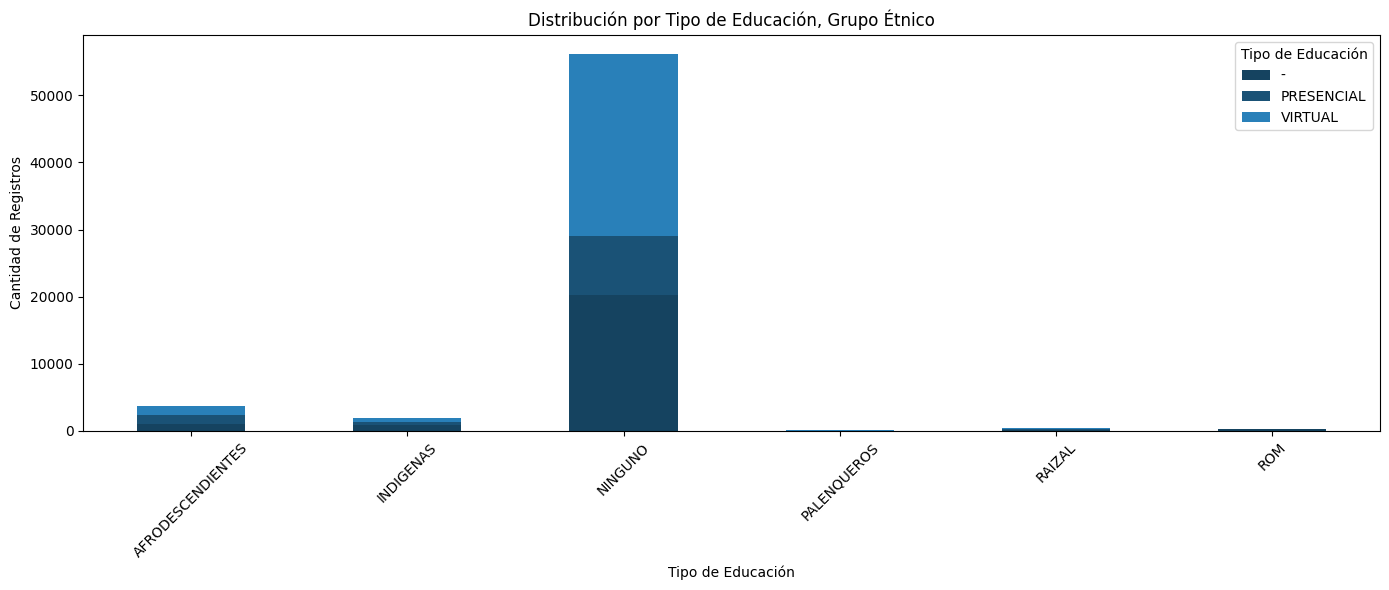

In [34]:
 #columna tipo y grupo étnico
# Agrupar los datos por las categorías de interés y contar el número de registros
agrupacion = df_Ciudadania_digital.groupby(['COMUNIDAD ETNICA','TIPO']).size().unstack()
colors = { '#1F618D', '#1A5276',  '#154360', '#2471A3',  '#5499C7','#2980B9'}
# Crear el gráfico de barras apiladas
agrupacion.plot(kind='bar', stacked=True, figsize=(14, 6), color=colors)

# Personalizar el gráfico
plt.title('Distribución por Tipo de Educación, Grupo Étnico')
plt.xlabel('Tipo de Educación')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend(title='Tipo de Educación')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


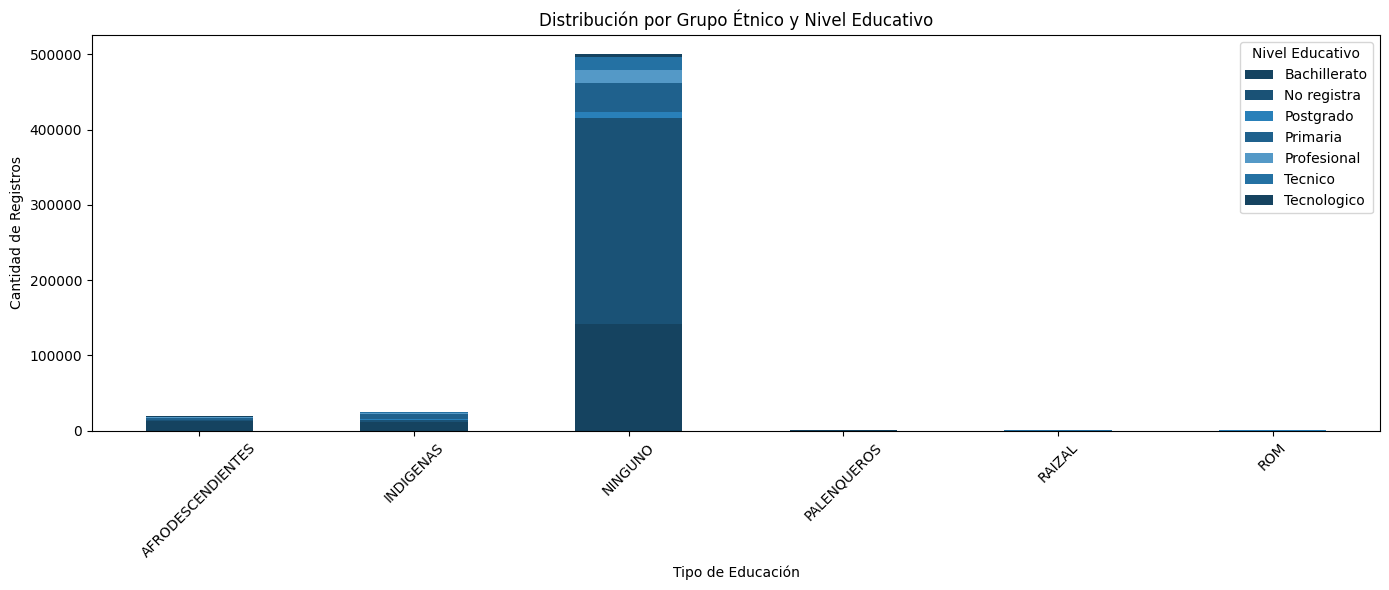

In [33]:
#Nivel educativo vs Comunidad Etnica
# Agrupar los datos por las categorías de interés y contar el número de registros
agrupacion = df_Ciudadania_digital.groupby(['COMUNIDAD ETNICA','NIVEL EDUCATIVO']).size().unstack()
colors = { '#1F618D', '#1A5276',  '#154360', '#2471A3',  '#5499C7','#2980B9'}
# Crear el gráfico de barras apiladas
agrupacion.plot(kind='bar', stacked=True, figsize=(14, 6), color=colors)

# Personalizar el gráfico
plt.title('Distribución por Grupo Étnico y Nivel Educativo')
plt.xlabel('Tipo de Educación')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend(title='Nivel Educativo')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


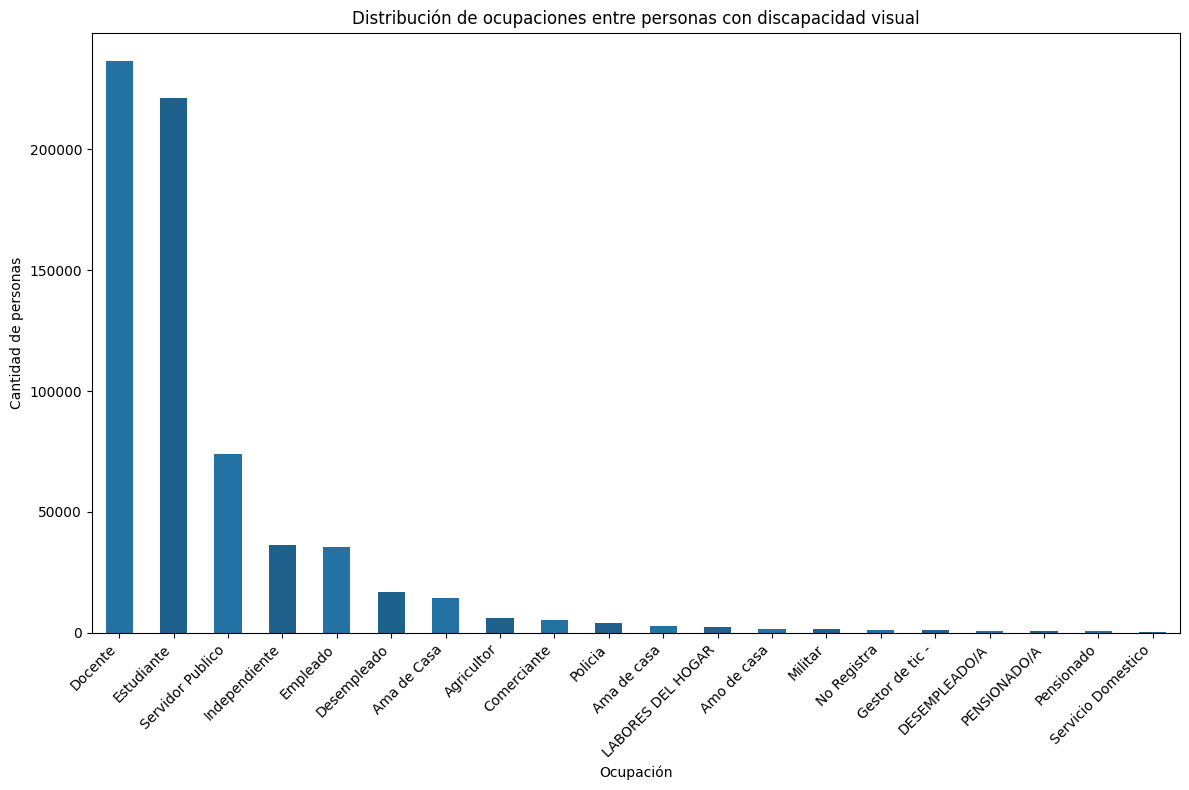

In [ ]:
# Filtrar el DataFrame para obtener solo las personas con discapacidad visual
df_discapacidad_visual = df_Ciudadania_digital[df_Ciudadania_digital['DISCAPACIDAD'] == 'Discapacidad Visual']
# Contar la cantidad de personas en cada ocupación
ocupacion_counts = df_Ciudadania_digital['OCUPACION'].value_counts().head(20)
# Colores proporcionados
colores = ['#2471A3', '#1F618D']
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = ocupacion_counts.plot(kind='bar', color=colores)
# Personalizar el gráfico
plt.title('Distribución de ocupaciones entre personas con discapacidad visual')
plt.xlabel('Ocupación')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Mostrar el gráfico
plt.show()

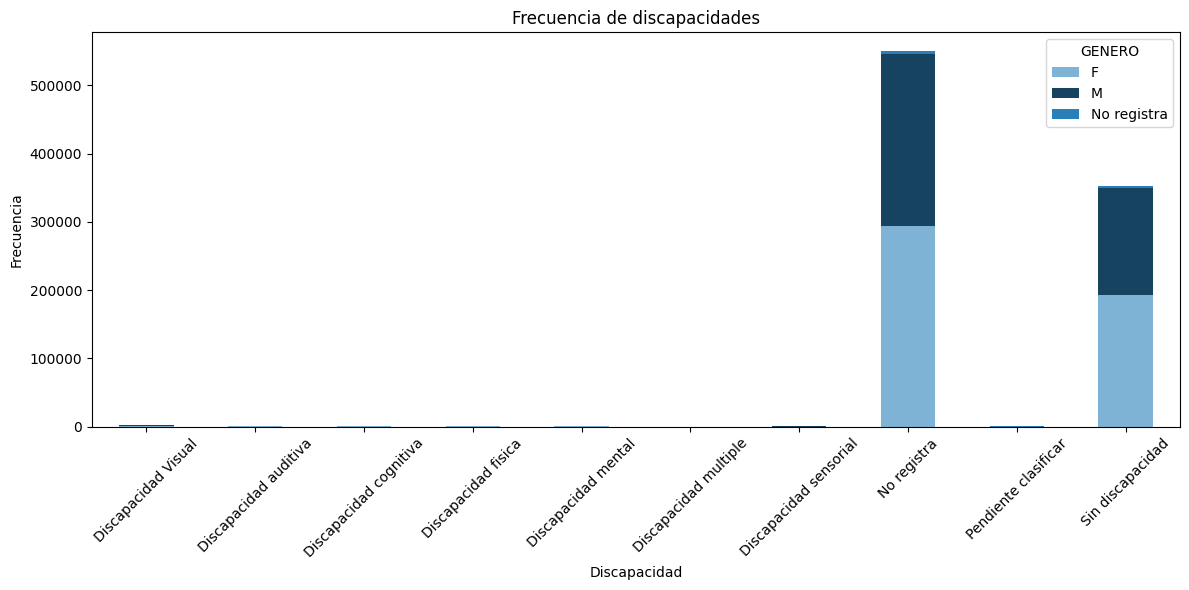

In [42]:
#Validacion de discapacidades por genero
disc_por_genero = df_Ciudadania_digital.groupby('DISCAPACIDAD')['GENERO'].value_counts().unstack()
disc_por_genero
# Colores 
colors = {'F': '#7FB3D5', 'M': '#154360', 'No registra': '#2980B9'}
# Crear la gráfica de barras apiladas con colores personalizados
disc_por_genero.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[column] for column in disc_por_genero.columns])
# Títulos y etiquetas
plt.title('Frecuencia de discapacidades')
plt.xlabel('Discapacidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que sean legibles
# Mostrar la gráfica
plt.tight_layout()
plt.show()

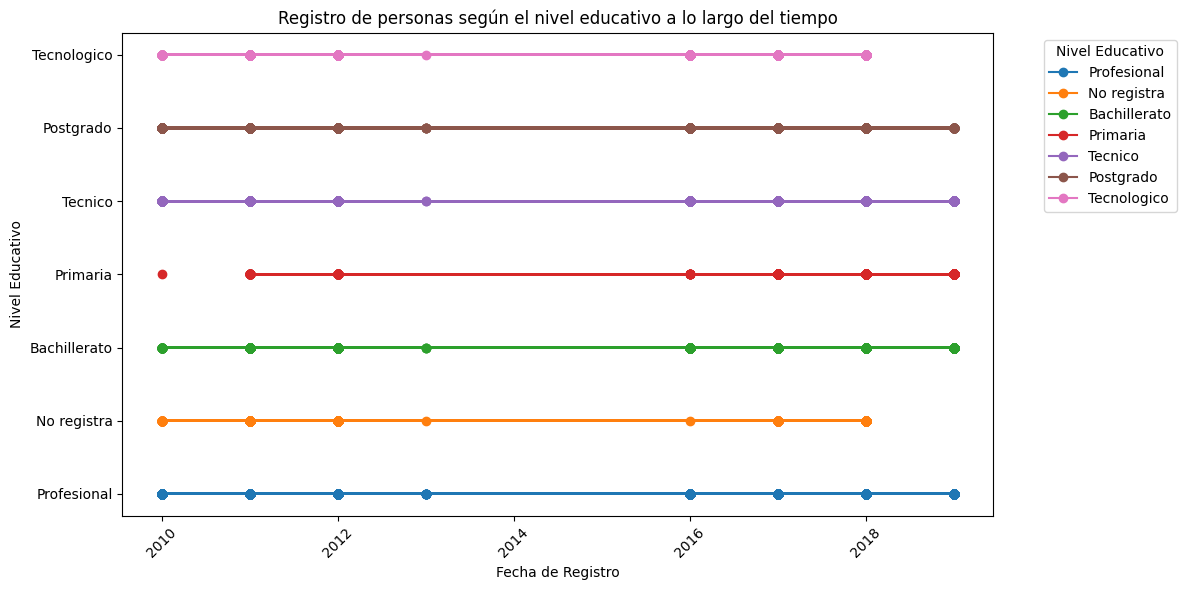

In [48]:
# Ordenar el DataFrame por fecha de registro
df_Registro = df_Ciudadania_digital['FECHA DE REGISTRO']

# Obtener los niveles educativos únicos
niveles_educativos = df_Ciudadania_digital['NIVEL EDUCATIVO'].unique()

# Crear el gráfico de líneas para cada nivel educativo
plt.figure(figsize=(12, 6))
for nivel_educativo in niveles_educativos:
    df_nivel_educativo = df_Ciudadania_digital[df_Ciudadania_digital['NIVEL EDUCATIVO'] == nivel_educativo]
    plt.plot(df_nivel_educativo['FECHA DE REGISTRO'], df_nivel_educativo['NIVEL EDUCATIVO'], marker='o', linestyle='-', label=nivel_educativo)

# Títulos y etiquetas
plt.title('Registro de personas según el nivel educativo a lo largo del tiempo')
plt.xlabel('Fecha de Registro')
plt.ylabel('Nivel Educativo')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que sean legibles
plt.legend(title='Nivel Educativo', bbox_to_anchor=(1.05, 1), loc='upper left')  # Añadir leyenda

# Mostrar la gráfica
plt.tight_layout()
plt.show()